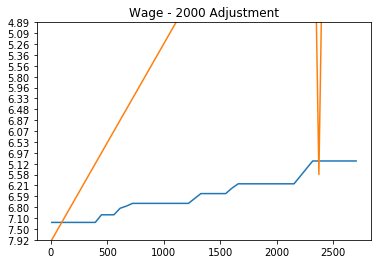

In [40]:
#! python3
# Data Science - Capstone 1
# Jacob Kovach

import numpy as np, matplotlib.pyplot as plt, pandas as pd
%matplotlib inline

wage = pd.read_csv('/Users/JKovach/Documents/test projects/duptest14_Capstone1/Wage Affordability Data.csv', encoding = "ISO-8859-1")

x = np.random.normal()

# Plot - wages vs 2000 adjustment
fed_wage_year = wage.loc[lambda fed: wage['State']=='Federal (FLSA)']
#print(fed_wage_year)

plt.plot(fed_wage_year['High.Value'])
plt.plot(fed_wage_year['High.2000'])
plt.title('Wage - 2000 Adjustment')
plt.show()

# Plot - rent prices group by year

# Histogram - Distribution of 

# Histogram - summarize number of states above 33 and 42 percent

#